## Analysis of the Distributions of Differences and Proportions by State
## FCC Net Neutrality Comments
### by Dimitri Kourouniotis


My exploration below shows that there is something statistically out of the norm about the distribution of the comments filed not being consistent with the distribution of the population.   

A sample of 3 million FCC Net Nuetrality comments were taken from the 22 million submitted. The data was cleaned to allocate as many comments as possible to their respective state through the zip code field in the address field. Some fraudulent ones were uncovered for example: 
* an IP address was provided instead of a zip code (in these instances the email address is 'netsparker@example.com' and the city of Chicago is situated in the state of Virgina)
* a valid zipcode appeared in the freeform text field 'internationaladdressentity' field but the city was omitted, something native residents would not do. In addition to a superfluous addition of "United States of America" where it is not required
* instances where a field would be NULL instead of simply blank yeilded a valid zipcode and city, but fake street address - it has already been reported in the press that hundreds of these appeared to posted at the exact identical time 

Once comments where attributed to their states, I imported census data for the 2016 population estimates of each state and DC. With this I created a dataframe with the: 
* % US Population in Each State 
* % of Total Comments by State
* % of Comments to State Population 
* Difference between % US Population and % of Total Comments.  

In [1]:
#import 
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('FCC_pop_comments_perc2.csv')

In [67]:
df.head(2)

,POPESTIMATE2016,perc_pop_of_nation,name,filers,perc_comments_of_total,perc_comments_to_state,diff_perc_pop_comments
0,4863300,1.51,Alabama,34193.0,1.47,0.70,0.04
1,741894,0.23,Alaska,5305.0,0.23,0.72,0.00


## The proportion of comments in each state to its population should be similar across the country
### H<sub>0</sub> Null Hypothesis: the distribution of proportions from each state is normal
### H<sub>1</sub> Alternative Hypothesis: the distribution of proportions from each state is not normal

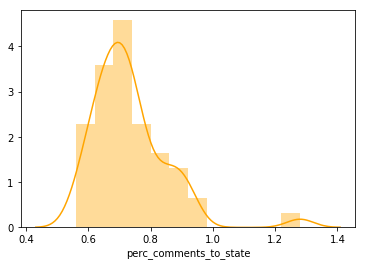

In [68]:
#within each state proportion of comments to population should be normally distributed
sns.distplot(df['perc_comments_to_state'],color='Orange')

In [16]:
s = pd.Series(df['perc_comments_to_state'])
s.describe()

count    51.000000
mean      0.731569
std       0.122676
min       0.560000
25%       0.650000
50%       0.710000
75%       0.770000
max       1.280000
Name: perc_comments_to_state, dtype: float64

In [62]:
#Test the normal distribution hypothesis from the Population Size = 51 (DC+50 states)
k2, p = stats.normaltest(df['perc_comments_to_state'])
alpha = 1e-3
print("alpha = {:g}".format(alpha))
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis CAN be rejected")
else:
     print("The null hypothesis CANNOT be rejected")


alpha = 0.001
p = 1.66366e-08
The null hypothesis CAN be rejected


## The proportion of comments from each state relative to the population proportion should be similar 
## Like the previous hypothesis but looking at it from a different angle
### H<sub>0</sub> Null Hypothesis: the distribution of comment proportions by state of is Normal
### H<sub>1</sub> Alternative Hypothesis: the distribution of proportions from each state is not Normal

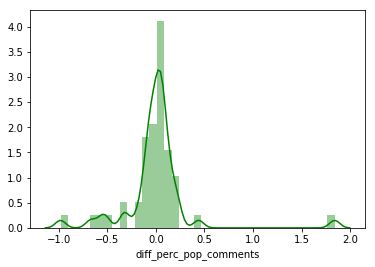

In [69]:
#The proportion of comments attributed to each state should be proportional to the population
#The difference in that proportion should be normally distributed
sns.distplot(df['diff_perc_pop_comments'],color='Green')

In [17]:
s = pd.Series(df['diff_perc_pop_comments'])
s.describe()

count    51.000000
mean     -0.000196
std       0.351571
min      -0.980000
25%      -0.070000
50%       0.030000
75%       0.075000
max       1.840000
Name: diff_perc_pop_comments, dtype: float64

In [63]:
#Test the normal distribution hypothesis from the Population Size = 51 (DC+50 states)
k2, p = stats.normaltest(df['diff_perc_pop_comments'])
alpha = 1e-3
print("alpha = {:g}".format(alpha))
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis CAN be rejected")
else:
     print("The null hypothesis CANNOT be rejected")


alpha = 0.001
p = 1.01365e-11
The null hypothesis CAN be rejected
